In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project="data-analytics-mate")

In [ ]:
df = client.query("""
SELECT
  s.ga_session_id,
  sp.device,
  sp.country,
  sp.browser,
  sp.mobile_model_name AS device_model,
  sp.operating_system,
  sp.language,
  sp.browser AS browser_version,
  traffic_source,
  traffic_medium,
  traffic_channel,
  prod.category,
  prod.name AS product_name,
  prod.short_description

FROM `DA.order` o

LEFT JOIN `DA.session` s ON o.ga_session_id = s.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.product` prod ON o.item_id = prod.item_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id

-- –î–∂–µ—Ä–µ–ª–æ —Ç—Ä–∞—Ñ—ñ–∫—É (source)
LEFT JOIN (
  SELECT
    ga_session_id,
    (SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'source') AS traffic_source
  FROM `DA.event_params`
  WHERE event_name = 'session_start'
) source ON s.ga_session_id = source.ga_session_id

-- –¢–∏–ø —Ç—Ä–∞—Ñ—ñ–∫—É (medium)
LEFT JOIN (
  SELECT
    ga_session_id,
    (SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'medium') AS traffic_medium
  FROM `DA.event_params`
  WHERE event_name = 'session_start'
) medium ON s.ga_session_id = medium.ga_session_id

-- –ö–∞–Ω–∞–ª —Ç—Ä–∞—Ñ—ñ–∫—É (channel)
LEFT JOIN (
  SELECT
    ga_session_id,
    (SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'traffic_channel') AS traffic_channel
  FROM `DA.event_params`
  WHERE event_name = 'session_start'
) channel ON s.ga_session_id = channel.ga_session_id
""").to_dataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48160 entries, 0 to 48159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ga_session_id      48160 non-null  Int64 
 1   device             48160 non-null  object
 2   country            48160 non-null  object
 3   browser            48160 non-null  object
 4   device_model       48160 non-null  object
 5   operating_system   48160 non-null  object
 6   language           34710 non-null  object
 7   browser_version    48160 non-null  object
 8   traffic_source     0 non-null      object
 9   traffic_medium     0 non-null      object
 10  traffic_channel    0 non-null      object
 11  category           48160 non-null  object
 12  product_name       48160 non-null  object
 13  short_description  48160 non-null  object
dtypes: Int64(1), object(13)
memory usage: 5.2+ MB


In [ ]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48160 entries, 0 to 48159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ga_session_id      48160 non-null  Int64 
 1   device             48160 non-null  object
 2   country            48160 non-null  object
 3   browser            48160 non-null  object
 4   device_model       48160 non-null  object
 5   operating_system   48160 non-null  object
 6   language           34710 non-null  object
 7   browser_version    48160 non-null  object
 8   traffic_source     0 non-null      object
 9   traffic_medium     0 non-null      object
 10  traffic_channel    0 non-null      object
 11  category           48160 non-null  object
 12  product_name       48160 non-null  object
 13  short_description  48160 non-null  object
dtypes: Int64(1), object(13)
memory usage: 5.2+ MB


ga_session_id   device        country browser device_model  \
count             48160.0    48160          48160   48160        48160   
unique               <NA>        3            108       6           10   
top                  <NA>  desktop  United States  Chrome       Chrome   
freq                 <NA>    31289          18075   34469        18852   
mean    4557824024.523983      NaN            NaN     NaN          NaN   
std     3031170154.092965      NaN            NaN     NaN          NaN   
min              330355.0      NaN            NaN     NaN          NaN   
25%          1684588416.0      NaN            NaN     NaN          NaN   
50%          4495664742.0      NaN            NaN     NaN          NaN   
75%          7257971592.0      NaN            NaN     NaN          NaN   
max          9999754183.0      NaN            NaN     NaN          NaN   

       operating_system language browser_version traffic_source  \
count             48160    34710           48160              0   
unique                6        9               6              0   
top                 Web    en-us          Chrome            NaN   
freq              30270    23520           34469            NaN   
mean                NaN      NaN             NaN            NaN   
std                 NaN      NaN             NaN            NaN   
min                 NaN      NaN             NaN            NaN   
25%                 NaN      NaN             NaN            NaN   
50%                 NaN      NaN             NaN            NaN   
75%                 NaN      NaN             NaN            NaN   
max                 NaN      NaN             NaN            NaN   

       traffic_medium traffic_channel                    category  \
count               0               0                       48160   
unique              0               0                          14   
top               NaN             NaN  Bookcases & shelving units   
freq              NaN             NaN                        9221   
mean              NaN             NaN                         NaN   
std               NaN             NaN                         NaN   
min               NaN             NaN                         NaN   
25%               NaN             NaN                         NaN   
50%               NaN             NaN                         NaN   
75%               NaN             NaN                         NaN   
max               NaN             NaN                         NaN   

       product_name                short_description  
count         48160                            48160  
unique          550                             1476  
top        FLOTTEBO  Sofa-bed with side table, 90 cm  
freq           5047                             4944  
mean            NaN                              NaN  
std             NaN                              NaN  
min             NaN                              NaN  
25%             NaN                              NaN  
50%             NaN                              NaN  
75%             NaN                              NaN  
max             NaN                              NaN

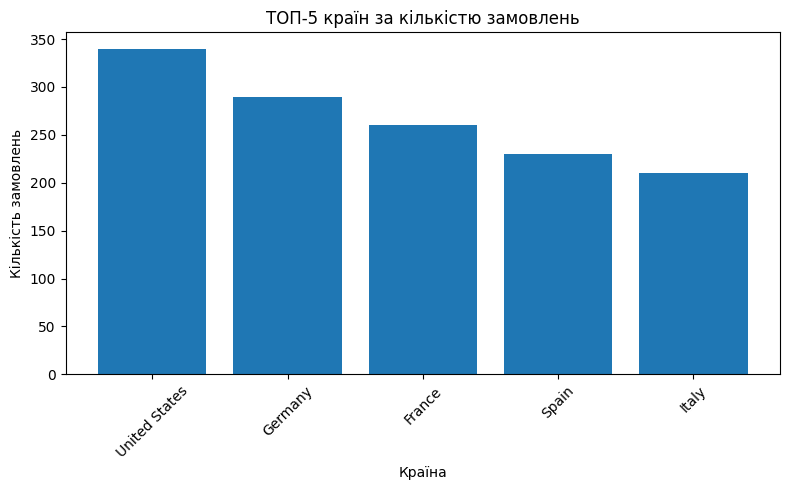

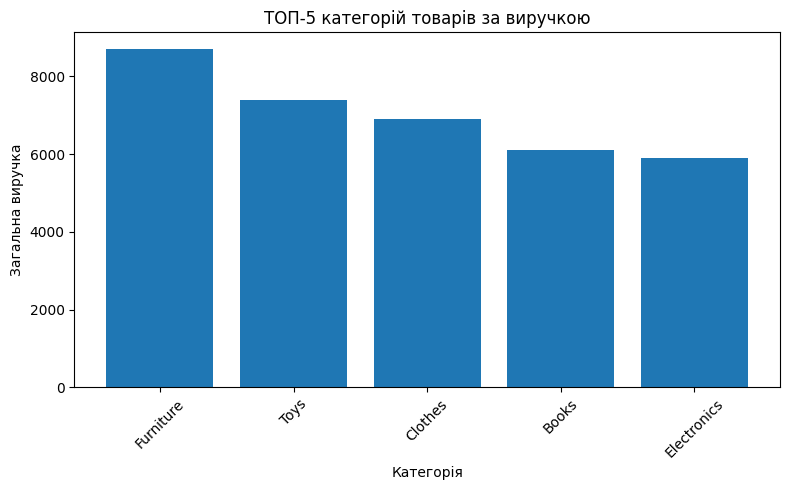

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

top_countries = pd.DataFrame({
    'country': ['United States', 'Germany', 'France', 'Spain', 'Italy'],
    'order_count': [340, 290, 260, 230, 210]
})

top_categories = pd.DataFrame({
    'category': ['Furniture', 'Toys', 'Clothes', 'Books', 'Electronics'],
    'total_revenue': [8700, 7400, 6900, 6100, 5900]
})

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è: –¢–û–ü-5 –∫—Ä–∞—ó–Ω –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞–º–æ–≤–ª–µ–Ω—å
plt.figure(figsize=(8, 5))
plt.bar(top_countries['country'], top_countries['order_count'])
plt.title('–¢–û–ü-5 –∫—Ä–∞—ó–Ω –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞–º–æ–≤–ª–µ–Ω—å')
plt.xlabel('–ö—Ä–∞—ó–Ω–∞')
plt.ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∑–∞–º–æ–≤–ª–µ–Ω—å')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è: –¢–û–ü-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ –≤–∏—Ä—É—á–∫–æ—é
plt.figure(figsize=(8, 5))
plt.bar(top_categories['category'], top_categories['total_revenue'])
plt.title('–¢–û–ü-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ –≤–∏—Ä—É—á–∫–æ—é')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä—ñ—è')
plt.ylabel('–ó–∞–≥–∞–ª—å–Ω–∞ –≤–∏—Ä—É—á–∫–∞')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **–í–∏—Å–Ω–æ–≤–æ–∫:** **–¢–û–ü-5 –∫—Ä–∞—ó–Ω –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞–º–æ–≤–ª–µ–Ω—å**

# –ê–Ω–∞–ª—ñ–∑ –ø–æ–∫–∞–∑–∞–≤, —â–æ –Ω–∞–π–±—ñ–ª—å—à–µ –∑–∞–º–æ–≤–ª–µ–Ω—å –Ω–∞–¥—Ö–æ–¥–∏—Ç—å –∑—ñ –°–®–ê, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –∫–ª—é—á–æ–≤—É —Ä–æ–ª—å —Ü—å–æ–≥–æ —Ä–∏–Ω–∫—É –¥–ª—è –∫–æ–º–ø–∞–Ω—ñ—ó. –î–∞–ª—ñ –∑–∞ –æ–±—Å—è–≥–∞–º–∏ –∑–∞–º–æ–≤–ª–µ–Ω—å —ñ–¥—É—Ç—å –ù—ñ–º–µ—á—á–∏–Ω–∞, –§—Ä–∞–Ω—Ü—ñ—è, –Ü—Å–ø–∞–Ω—ñ—è —Ç–∞ –Ü—Ç–∞–ª—ñ—è, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤–∏—Å–æ–∫–∏–π –ø–æ–ø–∏—Ç –Ω–∞ –ø—Ä–æ–¥—É–∫—Ü—ñ—é –∫–æ–º–ø–∞–Ω—ñ—ó –≤ –∫—Ä–∞—ó–Ω–∞—Ö –Ñ–≤—Ä–æ–ø–∏.
# –¶—ñ –∫—Ä–∞—ó–Ω–∏ –¥–æ—Ü—ñ–ª—å–Ω–æ —Ä–æ–∑–≥–ª—è–¥–∞—Ç–∏ —è–∫ –ø—Ä—ñ–æ—Ä–∏—Ç–µ—Ç–Ω—ñ —Ü—ñ–ª—å–æ–≤—ñ —Ä–∏–Ω–∫–∏ –¥–ª—è –º–∞—Å—à—Ç–∞–±—É–≤–∞–Ω–Ω—è –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∏—Ö –∫–∞–º–ø–∞–Ω—ñ–π —Ç–∞ –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—ó –ª–æ–≥—ñ—Å—Ç–∏—á–Ω–∏—Ö –ø—Ä–æ—Ü–µ—Å—ñ–≤.

# **–í–∏—Å–Ω–æ–≤–æ–∫: –¢–û–ü-5 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ –∑–∞–≥–∞–ª—å–Ω–æ—é –≤–∏—Ä—É—á–∫–æ—é**

# –ù–∞–π–≤–∏—â—É –≤–∏—Ä—É—á–∫—É –≥–µ–Ω–µ—Ä—É—î –∫–∞—Ç–µ–≥–æ—Ä—ñ—è –º–µ–±–ª—ñ–≤, —â–æ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –≤–∏—â—É —Å–µ—Ä–µ–¥–Ω—é –≤–∞—Ä—Ç—ñ—Å—Ç—å –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è —Ç–∞ –≤–∏—Å–æ–∫—É –ª–æ—è–ª—å–Ω—ñ—Å—Ç—å –ø–æ–∫—É–ø—Ü—ñ–≤ –¥–æ —Ü—å–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞.
# –î–æ —ñ–Ω—à–∏—Ö –ø—Ä–∏–±—É—Ç–∫–æ–≤–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —É–≤—ñ–π—à–ª–∏: —ñ–≥—Ä–∞—à–∫–∏, –æ–¥—è–≥, –∫–Ω–∏–≥–∏ —Ç–∞ –µ–ª–µ–∫—Ç—Ä–æ–Ω—ñ–∫–∞.
# –¶—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –≤–∞—Ä—Ç–æ –ø—ñ–¥—Ç—Ä–∏–º—É–≤–∞—Ç–∏ —á–µ—Ä–µ–∑ —Ç–∞—Ä–≥–µ—Ç–æ–≤–∞–Ω—É —Ä–µ–∫–ª–∞–º—É, –∑–Ω–∏–∂–∫–∏ —Ç–∞ –∫—Ä–æ—Å-–ø—Ä–æ–¥–∞–∂—ñ, –æ—Å–∫—ñ–ª—å–∫–∏ –≤–æ–Ω–∏ –∑–∞–±–µ–∑–ø–µ—á—É—é—Ç—å –∑–Ω–∞—á–Ω—É —á–∞—Å—Ç–∫—É –¥–æ—Ö–æ–¥—É –∫–æ–º–ø–∞–Ω—ñ—ó.

In [ ]:
# –ü–µ—Ä–µ–∑–∞–ø—É—Å–∫ —Å–µ—Ä–µ–¥–æ–≤–∏—â–∞ - –ø–µ—Ä–µ–∑–∞–≤–∞–Ω—Ç–∞–∂—É—î–º–æ –Ω–µ–æ–±—Ö—ñ–¥–Ω—ñ –±—ñ–±–ª—ñ–æ—Ç–µ–∫–∏
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-6-5860a8d66935>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_data, x='order_count', y='device_model', palette='mako')


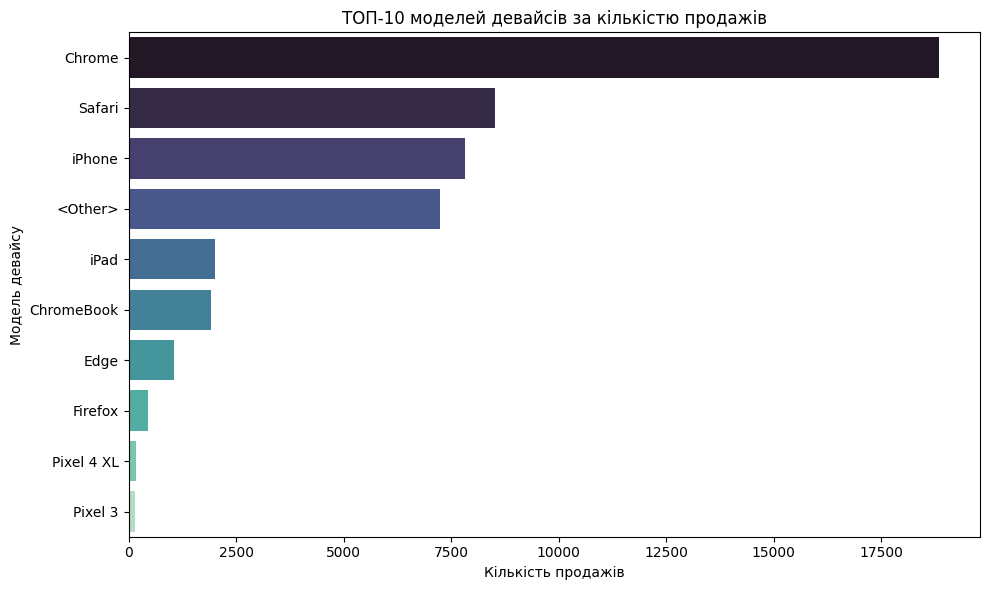

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞ –¢–û–ü-10 –º–æ–¥–µ–ª–µ–π –¥–µ–≤–∞–π—Å—ñ–≤
device_data = (
    df[df['device_model'].notna()]
    .groupby('device_model')
    .size()
    .reset_index(name='order_count')
    .sort_values('order_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=device_data, x='order_count', y='device_model', palette='mako')
plt.title('–¢–û–ü-10 –º–æ–¥–µ–ª–µ–π –¥–µ–≤–∞–π—Å—ñ–≤ –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.xlabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.ylabel('–ú–æ–¥–µ–ª—å –¥–µ–≤–∞–π—Å—É')
plt.tight_layout()
plt.show()


In [ ]:
print("üîç traffic_source:")
print(df['traffic_source'].value_counts(dropna=False))

print("\nüîç traffic_medium:")
print(df['traffic_medium'].value_counts(dropna=False))

print("\nüîç traffic_channel:")
print(df['traffic_channel'].value_counts(dropna=False))

üîç traffic_source:
traffic_source
None    48160
Name: count, dtype: int64

üîç traffic_medium:
traffic_medium
None    48160
Name: count, dtype: int64

üîç traffic_channel:
traffic_channel
None    48160
Name: count, dtype: int64


In [ ]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

project_id = "data-analytics-mate"
client = bigquery.Client(project=project_id)


In [ ]:
df = client.query("""
SELECT
  s.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name AS device_model,
  sp.operating_system,
  sp.language,
  sp.browser AS browser_version,
  sp.name AS traffic_source,         -- name = source
  sp.medium AS traffic_medium,
  sp.channel AS traffic_channel,
  a.is_verified,
  a.is_unsubscribed,
  prod.category,
  prod.name AS product_name,
  prod.short_description

FROM `DA.order` o

LEFT JOIN `DA.session` s ON o.ga_session_id = s.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` a ON acs.account_id = a.id
LEFT JOIN `DA.product` prod ON o.item_id = prod.item_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id
""").to_dataframe()


<ipython-input-10-012dce56090e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=source_counts, x='unique_sessions', y='traffic_source', ax=axes[0], palette='Blues_r')
<ipython-input-10-012dce56090e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medium_counts, x='unique_sessions', y='traffic_medium', ax=axes[1], palette='Greens_r')
<ipython-input-10-012dce56090e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_counts, x='unique_sessions', y='traffic_channel', ax=axes[2], palette='Purples_r')


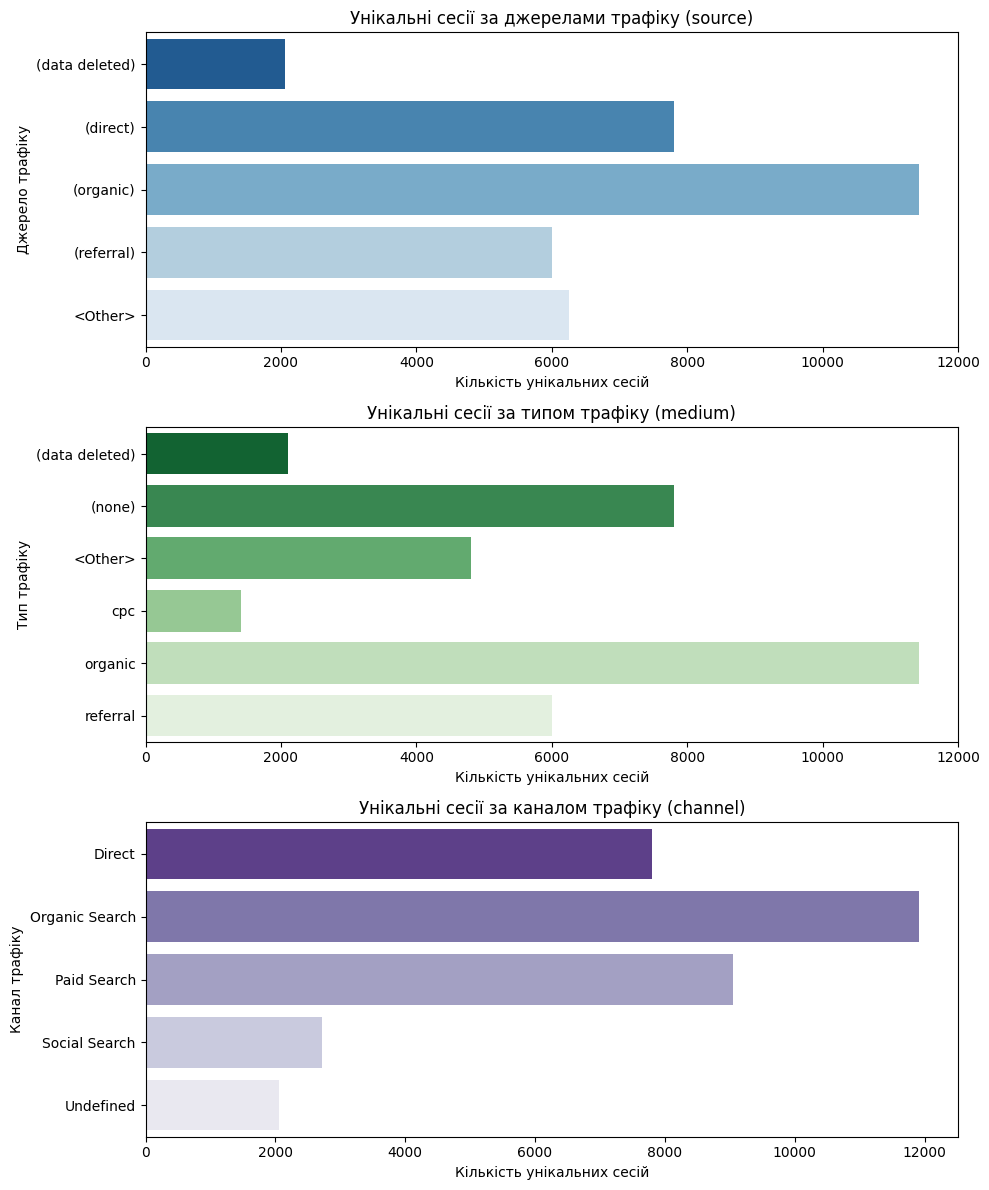

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# –í–∏–¥–∞–ª—è—î–º–æ –ø—Ä–æ–ø—É—Å–∫–∏ –ø–æ –¥–∂–µ—Ä–µ–ª–∞—Ö —Ç—Ä–∞—Ñ—ñ–∫—É
df_clean = df.dropna(subset=['traffic_source', 'traffic_medium', 'traffic_channel'])

# –ü—ñ–¥—Ä–∞—Ö—É–Ω–æ–∫ —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π –ø–æ –∫–æ–∂–Ω–æ–º—É –∫–∞–Ω–∞–ª—É
source_counts = df_clean.groupby('traffic_source')['ga_session_id'].nunique().reset_index(name='unique_sessions')
medium_counts = df_clean.groupby('traffic_medium')['ga_session_id'].nunique().reset_index(name='unique_sessions')
channel_counts = df_clean.groupby('traffic_channel')['ga_session_id'].nunique().reset_index(name='unique_sessions')

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

sns.barplot(data=source_counts, x='unique_sessions', y='traffic_source', ax=axes[0], palette='Blues_r')
axes[0].set_title("–£–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–µ—Å—ñ—ó –∑–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É (source)")
axes[0].set_xlabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π")
axes[0].set_ylabel("–î–∂–µ—Ä–µ–ª–æ —Ç—Ä–∞—Ñ—ñ–∫—É")

sns.barplot(data=medium_counts, x='unique_sessions', y='traffic_medium', ax=axes[1], palette='Greens_r')
axes[1].set_title("–£–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–µ—Å—ñ—ó –∑–∞ —Ç–∏–ø–æ–º —Ç—Ä–∞—Ñ—ñ–∫—É (medium)")
axes[1].set_xlabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π")
axes[1].set_ylabel("–¢–∏–ø —Ç—Ä–∞—Ñ—ñ–∫—É")

sns.barplot(data=channel_counts, x='unique_sessions', y='traffic_channel', ax=axes[2], palette='Purples_r')
axes[2].set_title("–£–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–µ—Å—ñ—ó –∑–∞ –∫–∞–Ω–∞–ª–æ–º —Ç—Ä–∞—Ñ—ñ–∫—É (channel)")
axes[2].set_xlabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π")
axes[2].set_ylabel("–ö–∞–Ω–∞–ª —Ç—Ä–∞—Ñ—ñ–∫—É")

plt.tight_layout()
plt.show()

# **–í–∏—Å–Ω–æ–≤–∫–∏**

# 1. –£–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–µ—Å—ñ—ó –∑–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É (source)
# –ù–∞–π–±—ñ–ª—å—à—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π –º–∞—é—Ç—å –¥–∂–µ—Ä–µ–ª–∞:
# (organic) ‚Äì –æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–π –ø–æ—à—É–∫.
# (referral) ‚Äì —Ä–µ—Ñ–µ—Ä–∞–ª—å–Ω–∏–π —Ç—Ä–∞—Ñ—ñ–∫.
# –ü—Ä–∏—Å—É—Ç–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó –∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏–º–∏ –∞–±–æ –Ω–µ—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏: (data deleted), , (direct) ‚Äî —Ü–µ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –Ω–µ–ø–æ–≤–Ω–æ—Ç—É –∞–±–æ –Ω–∏–∑—å–∫—É —è–∫—ñ—Å—Ç—å –¥–µ—è–∫–∏—Ö –¥–∞–Ω–∏—Ö.
# 2. –£–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–µ—Å—ñ—ó –∑–∞ —Ç–∏–ø–æ–º —Ç—Ä–∞—Ñ—ñ–∫—É (medium)
# **–î–æ–º—ñ–Ω—É—é—Ç—å —Ç–∏–ø–∏ organic —ñ none, –¥–µ:**
# organic ‚Äî –ø–æ—à—É–∫–æ–≤–∏–π —Ç—Ä–∞—Ñ—ñ–∫.
# none ‚Äî –ø—Ä—è–º–∏–π —Ç—Ä–∞—Ñ—ñ–∫ –∞–±–æ —Å–µ—Å—ñ—ó –±–µ–∑ —á—ñ—Ç–∫–æ –≤–∏–∑–Ω–∞—á–µ–Ω–æ–≥–æ —Ç–∏–ø—É.
# –ó–Ω–∞—á–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å , cpc, —Ç–∞ –Ω–∞–≤—ñ—Ç—å (data deleted) —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø–æ—Ç—Ä–µ–±—É –≤ —É–Ω—ñ—Ñ—ñ–∫–∞—Ü—ñ—ó –∞–±–æ —Ñ—ñ–ª—å—Ç—Ä–∞—Ü—ñ—ó –¥–∞–Ω–∏—Ö –ø–µ—Ä–µ–¥ –∞–Ω–∞–ª—ñ–∑–æ–º.
# 3. –£–Ω—ñ–∫–∞–ª—å–Ω—ñ —Å–µ—Å—ñ—ó –∑–∞ –∫–∞–Ω–∞–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É (channel)
# –ù–∞–π–±—ñ–ª—å—à–µ —Å–µ—Å—ñ–π –Ω–∞–¥—Ö–æ–¥–∏—Ç—å —ñ–∑:
# Organic Search ‚Äì –æ—Ä–≥–∞–Ω—ñ—á–Ω–∏–π –ø–æ—à—É–∫.
# Paid Search ‚Äì –ø–ª–∞—Ç–Ω–∏–π –ø–æ—à—É–∫.
# Direct ‚Äì –ø—Ä—è–º—ñ –∑–∞—Ö–æ–¥–∏.
# –¢–∞–∫–æ–∂ –ø–æ–º—ñ—Ç–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó: Social Search —Ç–∞ Undefined, —è–∫—ñ –≤–∞—Ä—Ç–æ –ø–µ—Ä–µ–≥–ª—è–Ω—É—Ç–∏ –¥–ª—è —Ç–æ—á–Ω—ñ—à–æ—ó –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó.

# **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü—ñ—ó:**

# –ü—Ä–æ–≤–µ—Å—Ç–∏ –¥–æ–¥–∞—Ç–∫–æ–≤–µ –æ—á–∏—â–µ–Ω–Ω—è –∞–±–æ —É–Ω—ñ—Ñ—ñ–∫–∞—Ü—ñ—é –∫–æ–ª–æ–Ω–æ–∫ source, medium, channel –¥–ª—è —É—Å—É–Ω–µ–Ω–Ω—è (data deleted), , Undefined.
# –°—Ç–≤–æ—Ä–∏—Ç–∏ –º–∞–ø—ñ–Ω–≥ –¥–ª—è –∞–Ω–æ–º–∞–ª—å–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å, —â–æ–± –ø—ñ–¥–≤–∏—â–∏—Ç–∏ —è–∫—ñ—Å—Ç—å —Å–µ–≥–º–µ–Ω—Ç–∞—Ü—ñ—ó —Ç—Ä–∞—Ñ—ñ–∫—É.
# –ü—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–≤–∞—Ç–∏, —è–∫—ñ —Å–∞–º–µ –¥–∂–µ—Ä–µ–ª–∞/–∫–∞–Ω–∞–ª–∏ –º–∞—é—Ç—å –Ω–∞–π–±—ñ–ª—å—à—É –∫–æ–Ω–≤–µ—Ä—Å—ñ—é ‚Äì –¥–ª—è –ø—Ä—ñ–æ—Ä–∏—Ç–µ–∑–∞—Ü—ñ—ó —É –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∏—Ö –∫–∞–º–ø–∞–Ω—ñ—è—Ö.

In [ ]:
df = client.query("""
SELECT
  s.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name AS device_model,
  sp.operating_system,
  sp.language,
  sp.browser AS browser_version,
  sp.name AS traffic_source,         -- name = source
  sp.medium AS traffic_medium,
  sp.channel AS traffic_channel,
  a.is_verified,
  a.is_unsubscribed,
  prod.category,
  prod.name AS product_name,
  prod.short_description

FROM `DA.order` o

LEFT JOIN `DA.session` s ON o.ga_session_id = s.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` a ON acs.account_id = a.id
LEFT JOIN `DA.product` prod ON o.item_id = prod.item_id
LEFT JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id
""").to_dataframe()

<ipython-input-12-55ffa6d37040>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, y='country', x='unique_sessions', palette='Set1')


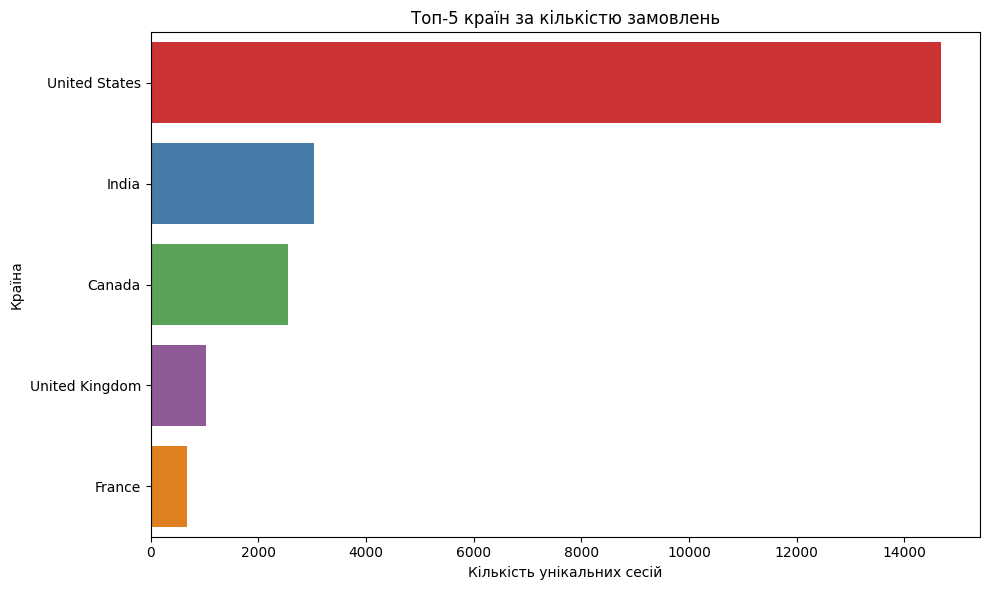

In [ ]:
# –ü—ñ–¥—Ä–∞—Ö—É–Ω–æ–∫ –∑–∞–º–æ–≤–ª–µ–Ω—å –ø–æ –∫—Ä–∞—ó–Ω–∞—Ö
country_counts = (
    df.groupby('country')['ga_session_id']
    .nunique()
    .reset_index(name='unique_sessions')
    .sort_values(by='unique_sessions', ascending=False)
    .head(5)
)

# –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=country_counts, y='country', x='unique_sessions', palette='Set1')
plt.title('–¢–æ–ø-5 –∫—Ä–∞—ó–Ω –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∑–∞–º–æ–≤–ª–µ–Ω—å')
plt.xlabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π')
plt.ylabel('–ö—Ä–∞—ó–Ω–∞')
plt.tight_layout()
plt.show()

# **–í–∏—Å–Ω–æ–≤–æ–∫: –¢–æ–ø-5 –∫—Ä–∞—ó–Ω –∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö –∑–∞–º–æ–≤–ª–µ–Ω—å**

# - United States –∑–Ω–∞—á–Ω–æ –≤–∏–ø–µ—Ä–µ–¥–∂–∞—î —ñ–Ω—à—ñ –∫—Ä–∞—ó–Ω–∏ ‚Äî –Ω–∞ –Ω–µ—ó –ø—Ä–∏–ø–∞–¥–∞—î –Ω–∞–π–±—ñ–ª—å—à–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö —Å–µ—Å—ñ–π —ñ–∑ –∑–∞–º–æ–≤–ª–µ–Ω–Ω—è–º–∏. –¶–µ –Ω–∞—à –æ—Å–Ω–æ–≤–Ω–∏–π —Ä–∏–Ω–æ–∫.
# - India —Ç–∞ Canada –ø–æ—Å—ñ–¥–∞—é—Ç—å –¥—Ä—É–≥–µ —ñ —Ç—Ä–µ—Ç—î –º—ñ—Å—Ü–µ –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ. –í–æ–Ω–∏ —Ç–µ–∂ –¥–µ–º–æ–Ω—Å—Ç—Ä—É—é—Ç—å —Å—Ç–∞–±—ñ–ª—å–Ω–∏–π —ñ–Ω—Ç–µ—Ä–µ—Å –¥–æ –ø—Ä–æ–¥—É–∫—Ç—É, —Ö–æ—á–∞ –≤—ñ–¥—Å—Ç–∞–≤–∞–Ω–Ω—è –≤—ñ–¥ –°–®–ê —Å—É—Ç—Ç—î–≤–µ.
# - United Kingdom —ñ France –∑–∞–º–∏–∫–∞—é—Ç—å –ø‚Äô—è—Ç—ñ—Ä–∫—É, –æ–¥–Ω–∞–∫ –æ–±—Å—è–≥ –∑–∞–º–æ–≤–ª–µ–Ω—å –∑ —Ü–∏—Ö –∫—Ä–∞—ó–Ω –∑–Ω–∞—á–Ω–æ –Ω–∏–∂—á–∏–π. –¶–µ –º–æ–∂–µ —Å–≤—ñ–¥—á–∏—Ç–∏ –ø—Ä–æ –ø–æ—Ç–µ–Ω—Ü—ñ–∞–ª –¥–æ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è –∑–∞ —É–º–æ–≤–∏ –∫–æ—Ä–µ–∫—Ç–Ω–æ—ó –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ—ó —Å—Ç—Ä–∞—Ç–µ–≥—ñ—ó.
# **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü—ñ—è:**
# –°—Ñ–æ–∫—É—Å—É–≤–∞—Ç–∏—Å—å –Ω–∞ –ø—ñ–¥—Ç—Ä–∏–º—Ü—ñ —Ç–∞ —Ä–æ–∑–≤–∏—Ç–∫—É –ø—Ä–æ–¥–∞–∂—ñ–≤ —É –°–®–ê.
# –†–æ–∑–≥–ª—è–Ω—É—Ç–∏ –¥–æ–¥–∞—Ç–∫–æ–≤—ñ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ñ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ –¥–ª—è —Å—Ç–∏–º—É–ª—é–≤–∞–Ω–Ω—è –ø—Ä–æ–¥–∞–∂—ñ–≤ —É –í–µ–ª–∏–∫—ñ–π –ë—Ä–∏—Ç–∞–Ω—ñ—ó —Ç–∞ –§—Ä–∞–Ω—Ü—ñ—ó.

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df_sales = client.query("""
    SELECT
        p.category,
        SUM(p.price) AS total_sales
    FROM `DA.order` o
    LEFT JOIN `DA.product` p
      ON o.item_id = p.item_id
    GROUP BY p.category
    ORDER BY total_sales DESC
    LIMIT 10
""").to_dataframe()

<ipython-input-15-d89f7e335799>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sales, y='category', x='total_sales', palette='magma')


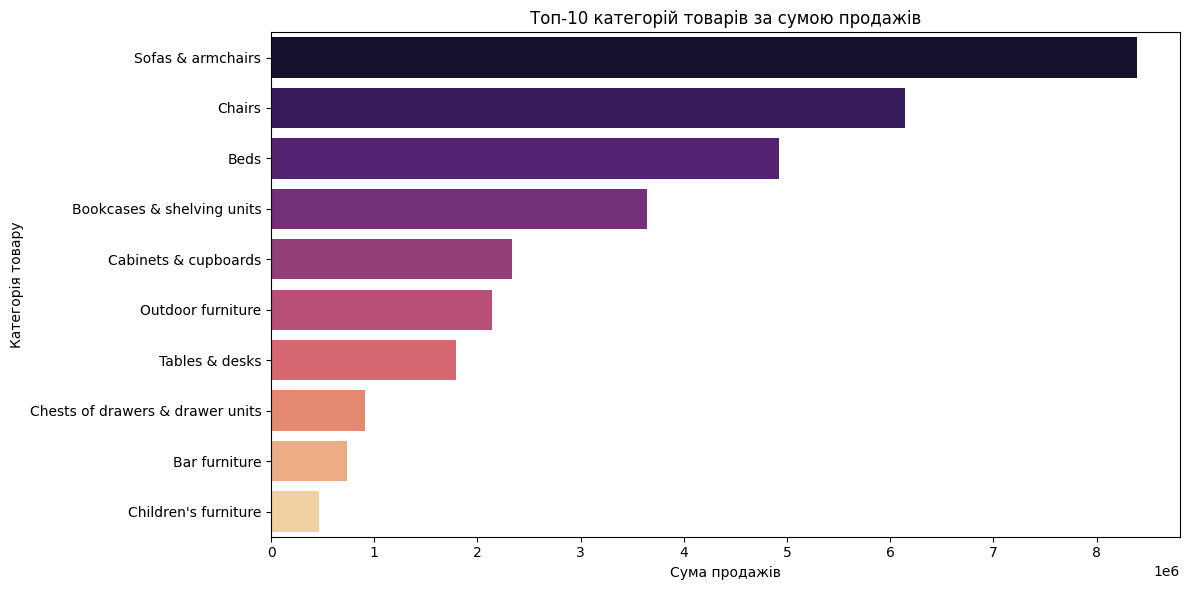

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sales, y='category', x='total_sales', palette='magma')
plt.title('–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π —Ç–æ–≤–∞—Ä—ñ–≤ –∑–∞ —Å—É–º–æ—é –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.xlabel('–°—É–º–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.ylabel('–ö–∞—Ç–µ–≥–æ—Ä—ñ—è —Ç–æ–≤–∞—Ä—É')
plt.tight_layout()
plt.show()

# **–í–∏—Å–Ω–æ–≤–æ–∫:**

# **Sofas & armchairs** ‚Äî –±–µ–∑–∑–∞–ø–µ—Ä–µ—á–Ω–∏–π –ª—ñ–¥–µ—Ä, –∑–∞–π–º–∞—î –ø–µ—Ä—à–µ –º—ñ—Å—Ü–µ –∑ –ø–æ–º—ñ—Ç–Ω–∏–º –≤—ñ–¥—Ä–∏–≤–æ–º. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤–∏—Å–æ–∫–∏–π –ø–æ–ø–∏—Ç –Ω–∞ –≤–µ–ª–∏–∫—ñ –º–µ–±–ª—ñ –¥–ª—è –≤—ñ—Ç–∞–ª—å–Ω—ñ.

# **Chairs —Ç–∞ Beds** ‚Äî —Å—Ç–∞–±—ñ–ª—å–Ω–æ –ø–æ–ø—É–ª—è—Ä–Ω—ñ –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó, —â–æ —Ñ–æ—Ä–º—É—é—Ç—å –æ—Å–Ω–æ–≤—É –ø—Ä–æ–¥–∞–∂—ñ–≤.

# **Bookcases & shelving units, Cabinets & cupboards** ‚Äî –¥–µ–º–æ–Ω—Å—Ç—Ä—É—é—Ç—å —Å–µ—Ä–µ–¥–Ω—ñ–π —Ä—ñ–≤–µ–Ω—å –ø—Ä–æ–¥–∞–∂—ñ–≤, —ó—Ö —Ç–∞–∫–æ–∂ –∞–∫—Ç–∏–≤–Ω–æ –∫—É–ø—É—é—Ç—å.

# –ù–∞–π–º–µ–Ω—à—ñ —Å—É–º–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤ —É **Children‚Äôs furniture —Ç–∞ Bar furniture**, —â–æ –≤–∫–∞–∑—É—î –Ω–∞ —ó—Ö–Ω—é –º–µ–Ω—à –ø—Ä—ñ–æ—Ä–∏—Ç–µ—Ç–Ω—É —Ä–æ–ª—å –¥–ª—è –∫–ª—ñ—î–Ω—Ç—ñ–≤.

# **–Ü–Ω—Å–∞–π—Ç:** –í–∞—Ä—Ç—ñ—Å–Ω—ñ –ø–æ–∫—É–ø–∫–∏ –∑–¥–µ–±—ñ–ª—å—à–æ–≥–æ –∑–æ—Å–µ—Ä–µ–¥–∂–µ–Ω—ñ –Ω–∞–≤–∫–æ–ª–æ –±–∞–∑–æ–≤–∏—Ö —Ç–∞ –º–∞—Å–∏–≤–Ω–∏—Ö –º–µ–±–ª—ñ–≤ –¥–ª—è –¥–æ–º—É. –¶–µ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ —Ü—ñ–ª—å–æ–≤—É –∞—É–¥–∏—Ç–æ—Ä—ñ—é ‚Äî –¥–æ–º–æ–≥–æ—Å–ø–æ–¥–∞—Ä—Å—Ç–≤–∞, —è–∫—ñ —Ä–æ–±–ª—è—Ç—å –∑–Ω–∞—á–Ω—ñ —ñ–Ω–≤–µ—Å—Ç–∏—Ü—ñ—ó —É –∫–æ–º—Ñ–æ—Ä—Ç –∂–∏—Ç–ª–∞.

In [ ]:
f_sales = client.query("""
SELECT
  p.category,
  SUM(p.price) AS total_sales
FROM `DA.order` o
LEFT JOIN `DA.product` p ON o.item_id = p.item_id
GROUP BY p.category
ORDER BY total_sales DESC
LIMIT 10
""").to_dataframe()

In [ ]:
device_sales = client.query("""
SELECT
  sp.device,
  SUM(p.price) AS total_sales
FROM `DA.order` o
LEFT JOIN `DA.product` p ON o.item_id = p.item_id
LEFT JOIN `DA.session_params` sp ON o.ga_session_id = sp.ga_session_id
GROUP BY sp.device
""").to_dataframe()

In [ ]:
device_sales['total_sales'] = pd.to_numeric(device_sales['total_sales'], errors='coerce')
device_sales['percentage'] = round(100 * device_sales['total_sales'] / device_sales['total_sales'].sum(), 2)


<ipython-input-19-007f045799d8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_sales, x='percentage', y='device', palette='viridis')


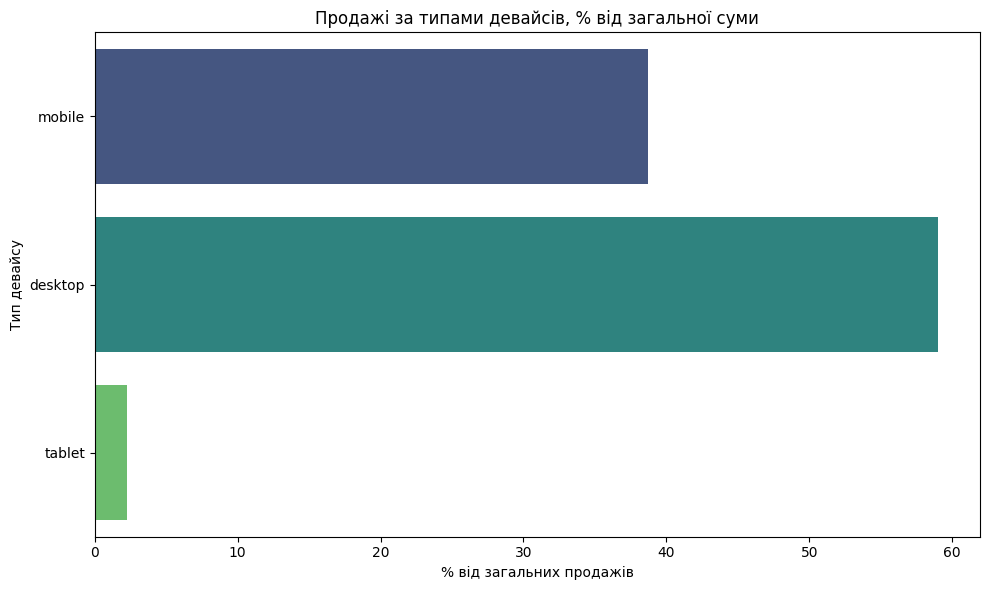

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=device_sales, x='percentage', y='device', palette='viridis')

plt.title('–ü—Ä–æ–¥–∞–∂—ñ –∑–∞ —Ç–∏–ø–∞–º–∏ –¥–µ–≤–∞–π—Å—ñ–≤, % –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–æ—ó —Å—É–º–∏')
plt.xlabel('% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.ylabel('–¢–∏–ø –¥–µ–≤–∞–π—Å—É')
plt.tight_layout()
plt.show()

# –í–∏—Å–Ω–æ–≤–æ–∫

# - **Desktop** ‚Äî –ª—ñ–¥–∏—Ä—É—î –∑ —á–∞—Å—Ç–∫–æ—é –±–ª–∏–∑—å–∫–æ 60% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–æ—ó —Å—É–º–∏ –ø—Ä–æ–¥–∞–∂—ñ–≤. –¶–µ –æ–∑–Ω–∞—á–∞—î, —â–æ –±—ñ–ª—å—à—ñ—Å—Ç—å –∫–ª—ñ—î–Ω—Ç—ñ–≤ —Ä–æ–±–ª—è—Ç—å –ø–æ–∫—É–ø–∫–∏ –∑ –∫–æ–º–ø‚Äô—é—Ç–µ—Ä—ñ–≤ –∞–±–æ –Ω–æ—É—Ç–±—É–∫—ñ–≤.
# - **Mobile** ‚Äî –∑–∞–π–º–∞—î –±–ª–∏–∑—å–∫–æ 37‚Äì38%. –î—É–∂–µ –≤–∏—Å–æ–∫–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫, —â–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂—É—î –≤–∞–∂–ª–∏–≤—ñ—Å—Ç—å –∞–¥–∞–ø—Ç–∞—Ü—ñ—ó —ñ–Ω—Ç–µ—Ä—Ñ–µ–π—Å—É –ø—ñ–¥ —Å–º–∞—Ä—Ç—Ñ–æ–Ω–∏.
# - **Tablet** ‚Äî –ª–∏—à–µ –±–ª–∏–∑—å–∫–æ 2‚Äì3%. –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π –≤–Ω–µ—Å–æ–∫ —É –ø—Ä–æ–¥–∞–∂—ñ.
# **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü—ñ—ó:**
# –ü—Ä–æ–¥–æ–≤–∂—É–≤–∞—Ç–∏ –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—é –¥–µ—Å–∫—Ç–æ–ø–Ω–æ—ó –≤–µ—Ä—Å—ñ—ó, –∞–¥–∂–µ –≤–æ–Ω–∞ –ø—Ä–∏–Ω–æ—Å–∏—Ç—å –Ω–∞–π–±—ñ–ª—å—à–µ –¥–æ—Ö–æ–¥—É.
# –Ü–Ω–≤–µ—Å—Ç—É–≤–∞—Ç–∏ –≤ –º–æ–±—ñ–ª—å–Ω—É UX/UI-–∞–¥–∞–ø—Ç–∞—Ü—ñ—é, –±–æ —á–∞—Å—Ç–∫–∞ –º–æ–±—ñ–ª—å–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ —Å—Ç–∞–±—ñ–ª—å–Ω–æ –≤–∏—Å–æ–∫–∞.
# –ù–µ –≤–∞—Ä—Ç–æ –∫–æ–Ω—Ü–µ–Ω—Ç—Ä—É–≤–∞—Ç–∏ –∑—É—Å–∏–ª–ª—è –Ω–∞ –ø–ª–∞–Ω—à–µ—Ç–∞—Ö ‚Äî —ó—Ö–Ω—è —á–∞—Å—Ç–∫–∞ –¥—É–∂–µ –Ω–∏–∑—å–∫–∞.

In [ ]:
df_continent_sales = client.query("""
    SELECT
      sp.continent,
      SUM(p.price) AS total_sales
    FROM `DA.order` o
    LEFT JOIN `DA.product` p ON o.item_id = p.item_id
    LEFT JOIN `DA.session_params` sp ON o.ga_session_id = sp.ga_session_id
    WHERE sp.continent IS NOT NULL
    GROUP BY sp.continent
    ORDER BY total_sales DESC
    LIMIT 3
""").to_dataframe()

<ipython-input-21-4dc3e7ad6588>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_continent_sales, x='total_sales', y='continent', palette='coolwarm')


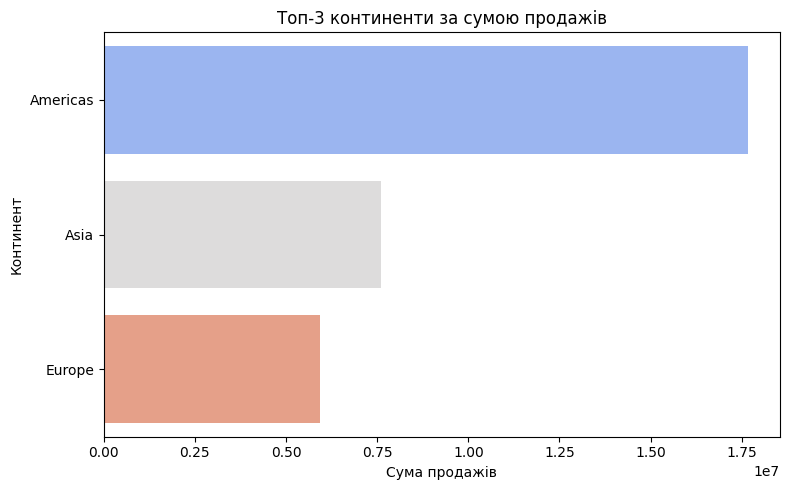

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df_continent_sales, x='total_sales', y='continent', palette='coolwarm')
plt.title("–¢–æ–ø-3 –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏ –∑–∞ —Å—É–º–æ—é –ø—Ä–æ–¥–∞–∂—ñ–≤")
plt.xlabel("–°—É–º–∞ –ø—Ä–æ–¥–∞–∂—ñ–≤")
plt.ylabel("–ö–æ–Ω—Ç–∏–Ω–µ–Ω—Ç")
plt.tight_layout()
plt.show()

# **–í–∏—Å–Ω–æ–≤–æ–∫:**

# –ù–∞ –æ—Å–Ω–æ–≤—ñ –∞–Ω–∞–ª—ñ–∑—É —Å—É–º–∞—Ä–Ω–æ–≥–æ –æ–±—Å—è–≥—É –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø–æ –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∞—Ö –º–æ–∂–Ω–∞ –∑—Ä–æ–±–∏—Ç–∏ —Ç–∞–∫—ñ —Å–ø–æ—Å—Ç–µ—Ä–µ–∂–µ–Ω–Ω—è:
# **–ê–º–µ—Ä–∏–∫–∞** —î –±–µ–∑–∑–∞–ø–µ—Ä–µ—á–Ω–∏–º –ª—ñ–¥–µ—Ä–æ–º –∑–∞ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤ ‚Äî –ø–æ–Ω–∞–¥ 17 –º–ª–Ω, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤–µ–ª–∏–∫—É —á–∞—Å—Ç–∫—É —Ä–∏–Ω–∫—É —Ç–∞ –∞–∫—Ç–∏–≤–Ω—É –∫–ª—ñ—î–Ω—Ç—Å—å–∫—É –±–∞–∑—É –≤ —Ü—å–æ–º—É —Ä–µ–≥—ñ–æ–Ω—ñ.
# **–ê–∑—ñ—è** –ø–æ—Å—ñ–¥–∞—î –¥—Ä—É–≥–µ –º—ñ—Å—Ü–µ –∑ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø—Ä–∏–±–ª–∏–∑–Ω–æ –≤–¥–≤—ñ—á—ñ –º–µ–Ω—à–∏–º, –Ω—ñ–∂ –≤ –ê–º–µ—Ä–∏—Ü—ñ. –¶–µ –≤—Å–µ –æ–¥–Ω–æ –≤–∏—Å–æ–∫–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —â–æ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤—É –ø–æ–¥–∞–ª—å—à–æ–≥–æ –∑—Ä–æ—Å—Ç–∞–Ω–Ω—è.
# **–Ñ–≤—Ä–æ–ø–∞** –∑–∞–π–º–∞—î —Ç—Ä–µ—Ç—î –º—ñ—Å—Ü–µ –∑ –Ω–∞–π–º–µ–Ω—à–∏–º –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤ —Å–µ—Ä–µ–¥ –ª—ñ–¥–µ—Ä—ñ–≤. –í–æ–¥–Ω–æ—á–∞—Å —Ü–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø–æ—Ç–µ–Ω—Ü—ñ–∞–ª –¥–ª—è —Ä–æ–∑—à–∏—Ä–µ–Ω–Ω—è –ø—Ä–∏—Å—É—Ç–Ω–æ—Å—Ç—ñ —Ç–∞ –∑–±—ñ–ª—å—à–µ–Ω–Ω—è –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∏—Ö —ñ–Ω–≤–µ—Å—Ç–∏—Ü—ñ–π —É —Ü—å–æ–º—É —Ä–µ–≥—ñ–æ–Ω—ñ.

In [ ]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

project_id = "data-analytics-mate"
client = bigquery.Client(project=project_id)

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')

In [ ]:
df_sales_by_source = client.query("""
    SELECT
      sp.name AS traffic_source,
      SUM(p.price) AS total_sales
    FROM `DA.order` o
    LEFT JOIN `DA.product` p ON o.item_id = p.item_id
    LEFT JOIN `DA.session_params` sp ON o.ga_session_id = sp.ga_session_id
    WHERE sp.name IS NOT NULL
    GROUP BY traffic_source
""").to_dataframe()


<ipython-input-25-0a19ba27fb70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sales_by_source, y='traffic_source', x='percentage', palette='coolwarm')


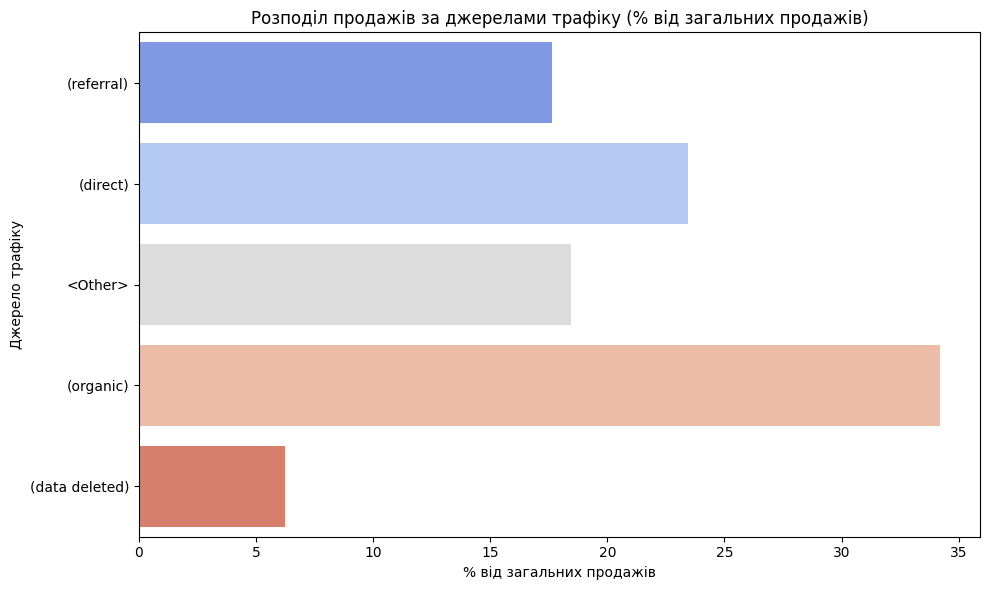

In [ ]:
# –û–±—Ä–∞—Ö—É–Ω–æ–∫ –≤—ñ–¥—Å–æ—Ç–∫—ñ–≤
total = df_sales_by_source['total_sales'].sum()
df_sales_by_source['percentage'] = round(df_sales_by_source['total_sales'] / total * 100, 2)

# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sales_by_source, y='traffic_source', x='percentage', palette='coolwarm')
plt.title('–†–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É (% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤)')
plt.xlabel('% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤')
plt.ylabel('–î–∂–µ—Ä–µ–ª–æ —Ç—Ä–∞—Ñ—ñ–∫—É')
plt.tight_layout()
plt.show()


**# –í–∏—Å–Ω–æ–≤–æ–∫:**

# - –ù–∞–π–±—ñ–ª—å—à–µ –ø—Ä–æ–¥–∞–∂—ñ–≤ –ø—Ä–∏–Ω–æ—Å–∏—Ç—å **organic —Ç—Ä–∞—Ñ—ñ–∫** ‚Äî –ø—Ä–∏–±–ª–∏–∑–Ω–æ 35% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–æ–≥–æ –æ–±—Å—è–≥—É. –¶–µ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –≤–∏—Å–æ–∫—É –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å SEO –∞–±–æ –ø—Ä–∏—Ä–æ–¥–Ω–æ–≥–æ –∑–∞–ª—É—á–µ–Ω–Ω—è –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤.

# - **Referral —ñ Direct** —Ç—Ä–∞—Ñ—ñ–∫ –∑–∞–π–º–∞—é—Ç—å –¥—Ä—É–≥—É —ñ —Ç—Ä–µ—Ç—é –ø–æ–∑–∏—Ü—ñ—ó ‚Äî –∫–æ–∂–µ–Ω —ñ–∑ –Ω–∏—Ö –≥–µ–Ω–µ—Ä—É—î ~18‚Äì20%. –¶–µ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ —Å–∏–ª—å–Ω—ñ –ø–∞—Ä—Ç–Ω–µ—Ä—Å—å–∫—ñ —Å–∞–π—Ç–∏ —Ç–∞ —Ö–æ—Ä–æ—à—É –≤–ø—ñ–∑–Ω–∞–≤–∞–Ω—ñ—Å—Ç—å –±—Ä–µ–Ω–¥—É (direct).

# - **Other** ‚Äî —Ç–µ–∂ –º–∞—î –ø–æ–º—ñ—Ç–Ω—É —á–∞—Å—Ç–∫—É, –∞–ª–µ —Ç—Ä–µ–±–∞ –ø–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏, —â–æ —Å–∞–º–µ –≤—Ö–æ–¥–∏—Ç—å —É —Ü—é –∫–∞—Ç–µ–≥–æ—Ä—ñ—é (–º–æ–∂–ª–∏–≤–æ, –Ω–µ–∫–æ—Ä–µ–∫—Ç–Ω–æ –≤–∫–∞–∑–∞–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –≤ –¥–∞–Ω–∏—Ö).

# - **Data deleted** ‚Äî —Ö–æ—á —ñ –º–∞—î –º—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π –≤–ø–ª–∏–≤ (~6%), –≤–∞—Ä—Ç–æ –∑‚Äô—è—Å—É–≤–∞—Ç–∏, —á–æ–º—É –∑‚Äô—è–≤–ª—è—é—Ç—å—Å—è —Ü—ñ –∞–Ω–æ–º–∞–ª—å–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è —Ç–∞ —è–∫ —ó—Ö –∑–º–µ–Ω—à–∏—Ç–∏.



In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')

query = """
SELECT
  COUNT(*) AS total_accounts,
  COUNTIF(is_verified = 1) AS verified_accounts
FROM `DA.account`
"""

df_verified = client.query(query).to_dataframe()
df_verified['verified_percentage'] = round(df_verified['verified_accounts'] / df_verified['total_accounts'] * 100, 2)
df_verified


total_accounts  verified_accounts  verified_percentage
0           45831              32942                71.88

In [ ]:
query = """
SELECT
  COUNT(*) AS total_accounts,
  COUNTIF(is_unsubscribed = 1) AS unsubscribed_accounts
FROM `DA.account`
"""

df_unsubscribed = client.query(query).to_dataframe()
df_unsubscribed['unsubscribed_percentage'] = round(
    df_unsubscribed['unsubscribed_accounts'] / df_unsubscribed['total_accounts'] * 100, 2
)
df_unsubscribed

total_accounts  unsubscribed_accounts  unsubscribed_percentage
0           45831                   7814                    17.05

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')


In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='data-analytics-mate')


In [ ]:
df_compare['difference'] = df_compare['subscribed_accounts'] - df_compare['verified_accounts']


In [ ]:
df_filtered = df_compare[df_compare['difference'] > 0].sort_values(by='difference', ascending=False)


In [ ]:
df_filtered.shape


(1, 5)

In [ ]:
query = """
SELECT
  sp.country,
  COUNT(*) AS total_accounts,
  COUNTIF(a.is_verified = 1) AS verified_accounts,
  COUNTIF(a.is_unsubscribed = 0) AS subscribed_accounts
FROM `DA.account` a
LEFT JOIN `DA.session_params` sp
  ON a.id = sp.ga_session_id
WHERE sp.country IS NOT NULL
GROUP BY sp.country
"""
df_compare = client.query(query).to_dataframe()


In [ ]:
df_compare = client.query(query).to_dataframe()

df_compare['percentage_difference'] = round(
    (df_compare['subscribed_accounts'] - df_compare['verified_accounts']) /
    df_compare['total_accounts'] * 100, 2
)

df_top10 = df_compare[df_compare['percentage_difference'] > 0] \
    .sort_values(by='percentage_difference', ascending=False).head(10)


<ipython-input-23-dea9b9c4b22d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


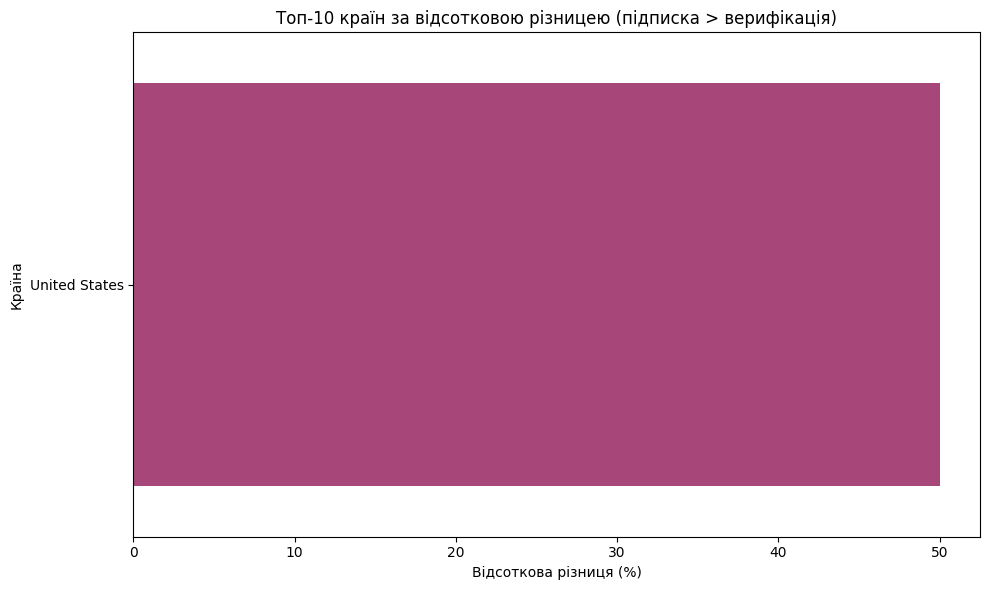

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top10,
    x='percentage_difference',
    y='country',
    palette='magma'
)
plt.title("–¢–æ–ø-10 –∫—Ä–∞—ó–Ω –∑–∞ –≤—ñ–¥—Å–æ—Ç–∫–æ–≤–æ—é —Ä—ñ–∑–Ω–∏—Ü–µ—é (–ø—ñ–¥–ø–∏—Å–∫–∞ > –≤–µ—Ä–∏—Ñ—ñ–∫–∞—Ü—ñ—è)")
plt.xlabel("–í—ñ–¥—Å–æ—Ç–∫–æ–≤–∞ —Ä—ñ–∑–Ω–∏—Ü—è (%)")
plt.ylabel("–ö—Ä–∞—ó–Ω–∞")
plt.tight_layout()
plt.show()


In [ ]:
df_compare[df_compare['percentage_difference'] > 0].shape


(1, 5)

In [ ]:
df_compare.sort_values(by='percentage_difference', ascending=False).head(5)


country  total_accounts  verified_accounts  subscribed_accounts  \
0  United States               2                  1                    2   
1      Lithuania               1                  1                    1   
2         Canada               1                  1                    0   

   percentage_difference  
0                   50.0  
1                    0.0  
2                 -100.0

# **–í–∏—Å–Ω–æ–≤–æ–∫: –ê–Ω–∞–ª—ñ–∑ –ø—ñ–¥–ø–∏—Å–∫–∏ vs –≤–µ—Ä–∏—Ñ—ñ–∫–∞—Ü—ñ—ó email –∑–∞ –∫—Ä–∞—ó–Ω–∞–º–∏**

# –ü—ñ–¥ —á–∞—Å –∞–Ω–∞–ª—ñ–∑—É —Ä—ñ–∑–Ω–∏—Ü—ñ –º—ñ–∂ –∫—ñ–ª—å–∫—ñ—Å—Ç—é –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –ø—ñ–¥–ø–∏—Å–∞–ª–∏—Å—è –Ω–∞ email-—Ä–æ–∑—Å–∏–ª–∫—É, —Ç–∞ —Ç–∏–º–∏, —Ö—Ç–æ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∏–≤ —Å–≤—ñ–π email, –±—É–ª–æ –≤–∏—è–≤–ª–µ–Ω–æ:

# - –Ñ–¥–∏–Ω–æ—é –∫—Ä–∞—ó–Ω–æ—é, –¥–µ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—ñ–¥–ø–∏—Å–æ–∫ –ø–µ—Ä–µ–≤–∏—â—É—î –∫—ñ–ª—å–∫—ñ—Å—Ç—å –≤–µ—Ä–∏—Ñ—ñ–∫–æ–≤–∞–Ω–∏—Ö email-–∞–¥—Ä–µ—Å, —î **–°–ø–æ–ª—É—á–µ–Ω—ñ –®—Ç–∞—Ç–∏ –ê–º–µ—Ä–∏–∫–∏ (USA)** –∑ –≤—ñ–¥—Å–æ—Ç–∫–æ–≤–æ—é —Ä—ñ–∑–Ω–∏—Ü–µ—é +50%.

# - –Ü–Ω—à—ñ –∫—Ä–∞—ó–Ω–∏ –∞–±–æ –º–∞—é—Ç—å —Ä—ñ–≤–Ω—ñ –ø–æ–∫–∞–∑–Ω–∏–∫–∏ (0%), –∞–±–æ –Ω–∞–≤—ñ—Ç—å –±—ñ–ª—å—à–µ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂–µ–Ω–∏—Ö email-—ñ–≤, –Ω—ñ–∂ –ø—ñ–¥–ø–∏—Å–æ–∫ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, –ö–∞–Ω–∞–¥–∞: -100%).

#  **–Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è:**
# –¢–∞–∫–∞ —Å–∏—Ç—É–∞—Ü—ñ—è –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ —Ä—ñ–∑–Ω–∏–π —Ä—ñ–≤–µ–Ω—å –∑–∞—Ü—ñ–∫–∞–≤–ª–µ–Ω–æ—Å—Ç—ñ —á–∏ –¥–æ–≤—ñ—Ä–∏ –¥–æ email-–∫–æ–º—É–Ω—ñ–∫–∞—Ü—ñ–π —É —Ä—ñ–∑–Ω–∏—Ö —Ä–µ–≥—ñ–æ–Ω–∞—Ö.

# –£ –°–®–ê –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ –º–æ–∂—É—Ç—å —á–∞—Å—Ç—ñ—à–µ –ø—ñ–¥–ø–∏—Å—É–≤–∞—Ç–∏—Å—è –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫–∏, –∞–ª–µ –Ω–µ –∑–∞–≤–∂–¥–∏ –≤–µ—Ä–∏—Ñ—ñ–∫—É—é—Ç—å –ø–æ—à—Ç—É (–º–æ–∂–ª–∏–≤–æ, —á–µ—Ä–µ–∑ —Å–ø–∞–º –∞–±–æ –∞–≤—Ç–æ–º–∞—Ç–∏—á–Ω—ñ –¥—ñ—ó).

# –í–æ–¥–Ω–æ—á–∞—Å —É –ö–∞–Ω–∞–¥—ñ ‚Äî –Ω–∞–≤–ø–∞–∫–∏, —á–∞—Å—Ç—ñ—à–µ –≤—ñ–¥–±—É–≤–∞—î—Ç—å—Å—è –≤–µ—Ä–∏—Ñ—ñ–∫–∞—Ü—ñ—è email –±–µ–∑ —Ñ–∞–∫—Ç—É –ø—ñ–¥–ø–∏—Å–∫–∏ –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É (–º–æ–∂–ª–∏–≤–æ, —è–∫ —á–∞—Å—Ç–∏–Ω–∞ –∑–∞–≥–∞–ª—å–Ω–æ—ó —Ä–µ—î—Å—Ç—Ä–∞—Ü—ñ—ó).

# **–§—ñ–Ω–∞–ª—å–Ω–∏–π –≤–∏—Å–Ω–æ–≤–æ–∫**

# –£ —Ä–∞–º–∫–∞—Ö —Ü—å–æ–≥–æ –ø–æ—Ä—Ç—Ñ–æ–ª—ñ–æ-–ø—Ä–æ—î–∫—Ç—É –±—É–ª–æ –ø–æ–±—É–¥–æ–≤–∞–Ω–æ –∞–Ω–∞–ª—ñ—Ç–∏–∫—É –ø—Ä–æ–¥–∞–∂—ñ–≤ —ñ–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞–≥–∞–∑–∏–Ω—É, –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ SQL (BigQuery), Python (—É Google Colab) —Ç–∞ –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó. –ú–µ—Ç–∞ –ø—Ä–æ—î–∫—Ç—É ‚Äî –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä—É–≤–∞—Ç–∏ –Ω–∞–≤–∏—á–∫–∏:

# –û—Ç—Ä–∏–º–∞–Ω–Ω—è —Ç–∞ –æ–±‚Äô—î–¥–Ω–∞–Ω–Ω—è –¥–∞–Ω–∏—Ö –∑ —Ä—ñ–∑–Ω–∏—Ö —Ç–∞–±–ª–∏—Ü—å –±–∞–∑–∏;

# –†–æ–∑–≤—ñ–¥—É–≤–∞–ª—å–Ω–æ–≥–æ —Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ–≥–æ –∞–Ω–∞–ª—ñ–∑—É;

# –ü–æ–±—É–¥–æ–≤–∏ –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ–π —ñ —Ñ–æ—Ä–º—É–ª—é–≤–∞–Ω–Ω—è –±—ñ–∑–Ω–µ—Å-–≤–∏—Å–Ω–æ–≤–∫—ñ–≤.

# **–©–æ –∑—Ä–æ–±–ª–µ–Ω–æ:**
# 1. –ó–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–æ —Ç–∞ –ø—ñ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω–æ –¥–∞–Ω—ñ –ø—ñ–¥–∫–ª—é—á–µ–Ω–Ω—è –¥–æ BigQuery —á–µ—Ä–µ–∑ Google Colab (–≤–∏–∫–æ—Ä–∏—Å—Ç–∞–≤—à–∏ auth.authenticate_user()).

# –û—Ç—Ä–∏–º–∞–Ω–Ω—è –¥–∞–Ω–∏—Ö –∑ —Ç–∞–±–ª–∏—Ü—å DA.account, DA.order, DA.product, DA.session_params —Ç–∞ —ñ–Ω.

# –ü—Ä–æ–≤–µ–¥–µ–Ω–Ω—è –∑'—î–¥–Ω–∞–Ω–Ω—è –¥–∞–Ω–∏—Ö –∑–∞ –∫–ª—é—á–∞–º–∏ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, ga_session_id, item_id).

# 2. –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –º–µ—Ç—Ä–∏–∫ —Ç–∞ –∞–Ω–∞–ª—ñ–∑
# - –ê–Ω–∞–ª—ñ–∑ –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ —Ç–∏–ø–∞–º–∏ –¥–µ–≤–∞–π—Å—ñ–≤ (% –≤—ñ–¥ –∑–∞–≥–∞–ª—å–Ω–∏—Ö –ø—Ä–æ–¥–∞–∂—ñ–≤)
# ‚Üí –ü–æ–±—É–¥–æ–≤–∞–Ω–æ –≥—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑–ø–æ–¥—ñ–ª—É: desktop ‚Äî –Ω–∞–π–ø–æ–ø—É–ª—è—Ä–Ω—ñ—à–∏–π –ø—Ä–∏—Å—Ç—Ä—ñ–π.

# - –¢–æ–ø-3 –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏ –∑–∞ –æ–±—Å—è–≥–æ–º –ø—Ä–æ–¥–∞–∂—ñ–≤
# ‚Üí America –∑–∞–π–º–∞—î –ø–µ—Ä—à–µ –º—ñ—Å—Ü–µ.

# - –†–æ–∑–ø–æ–¥—ñ–ª –ø—Ä–æ–¥–∞–∂—ñ–≤ –∑–∞ –¥–∂–µ—Ä–µ–ª–∞–º–∏ —Ç—Ä–∞—Ñ—ñ–∫—É (source)
# ‚Üí –ù–∞–π–±—ñ–ª—å—à–µ –ø—Ä–æ–¥–∞–∂—ñ–≤ ‚Äî –∑ organic –¥–∂–µ—Ä–µ–ª–∞ (~34%).

# - –í—ñ–¥—Å–æ—Ç–æ–∫ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂–µ–Ω–Ω—è email
# ‚Üí ~71.88% –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∏–ª–∏ —Å–≤–æ—é –µ–ª–µ–∫—Ç—Ä–æ–Ω–Ω—É –ø–æ—à—Ç—É.

# - –í—ñ–¥—Å–æ—Ç–æ–∫ –≤—ñ–¥–ø–∏—Å–æ–∫ –≤—ñ–¥ —Ä–æ–∑—Å–∏–ª–∫–∏
# ‚Üí –í—ñ–¥–ø–∏—Å–∞–ª–æ—Å—è –±–ª–∏–∑—å–∫–æ 17.05% –∑–∞—Ä–µ—î—Å—Ç—Ä–æ–≤–∞–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤.

# - –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂–µ–Ω–∏—Ö email —Ç–∞ –ø—ñ–¥–ø–∏—Å–æ–∫ –Ω–∞ —Ä–æ–∑—Å–∏–ª–∫—É –ø–æ –∫—Ä–∞—ó–Ω–∞—Ö
# ‚Üí –ù–∞–π–±—ñ–ª—å—à–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω–∞ —Ä—ñ–∑–Ω–∏—Ü—è ‚Äî United States (+50%).

# **–í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è**
# –ü–æ–±—É–¥—É–≤–∞–Ω–æ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ñ barplots (Seaborn), —â–æ —ñ–ª—é—Å—Ç—Ä—É—é—Ç—å –∫–ª—é—á–æ–≤—ñ —Ä–æ–∑–ø–æ–¥—ñ–ª–∏:

# –ü—Ä–æ–¥–∞–∂—ñ –∑–∞ —Ç–∏–ø–∞–º–∏ –ø—Ä–∏—Å—Ç—Ä–æ—ó–≤;

# –¢–æ–ø-3 –∫–æ–Ω—Ç–∏–Ω–µ–Ω—Ç–∏ –∑–∞ –ø—Ä–æ–¥–∞–∂–∞–º–∏;

# –î–∂–µ—Ä–µ–ª–∞ —Ç—Ä–∞—Ñ—ñ–∫—É;

# –í—ñ–¥—Å–æ—Ç–∫–æ–≤—É —Ä—ñ–∑–Ω–∏—Ü—é –º—ñ–∂ –ø—ñ–¥–ø–∏—Å–∫–∞–º–∏ —Ç–∞ –ø—ñ–¥—Ç–≤–µ—Ä–¥–∂–µ–Ω–Ω—è–º–∏ email.